##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini embedding models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Embeddings.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

Embeddings are numerical representations that capture the relationships between different inputs. Text embeddings achieve this by converting text into arrays of floating-point numbers known as vectors. The primary purpose of these vectors is to encapsulate the semantic meaning of the text. The dimensionality of the vector, which is the length of the embedding array, can be quite large, with a passage of text sometimes being represented by a vector with hundreds of dimensions.

The Gemini API generates state-of-the-art text embeddings. An embedding is a list of floating point numbers that represent the meaning of a word, sentence, or paragraph. You can use embeddings in many downstream applications like document search.

This notebook provides quick code examples that show you how to get started generating embeddings.

## Table of Contents

1.  **Setup:** Install the SDK and set up your API key.
2.  **Embed content:** Generate text embeddings for single or multiple inputs.
3.  **Truncating embeddings:** Explore how to reduce the dimensionality of embeddings.
4.  **Embeddings in practice - Sentences similarity analysis:** Use embeddings to analyze the similarity between sentences using cosine similarity and visualize the results with a heatmap.
5.  **Using `task_type` for different scenarios:** Learn how to use `task_type` for various applications like Retrieval Augmented Generation (RAG), including an example of building a simple FAQ system.

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [ ]:
%pip install -q -U "google-genai>=1.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 7.1 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](../quickstarts/Authentication.ipynb) for an example.

In [ ]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [ ]:
from google import genai

client = genai.Client(api_key=GEMINI_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [ ]:
MODEL_ID = "gemini-embedding-001" # @param ["gemini-embedding-001", "text-embedding-004"] {"allow-input":true, isTemplate: true}

## Embed content

Call the `embed_content` method with the model to generate text embeddings.

In [ ]:
text = ["Hello world"]
result = client.models.embed_content(model=MODEL_ID, contents=text)
[embedding] = result.embeddings

# Print just a part of the embedding to keep the output manageable
print(str(embedding.values)[:50], '... TRIMMED]')

[-0.02342152, 0.01676572, 0.009261323, -0.06383, - ... TRIMMED]


In [ ]:
print(len(embedding.values))  # The embeddings have 3072 dimensions by default

3072


## Batch embed content

You can embed a list of multiple prompts with one API call for efficiency.

In [ ]:
result = client.models.embed_content(
    model=MODEL_ID,
    contents=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'])

for embedding in result.embeddings:
    # Print just a part of the embedding to keep the output manageable
  print(str(embedding)[:50], '... TRIMMED]')

values=[-0.022374554, -0.004560777, 0.013309286, - ... TRIMMED]
values=[-0.007975887, -0.02141119, -0.0016711014,  ... TRIMMED]
values=[-0.0047850125, 0.008764064, 0.0062852204,  ... TRIMMED]


## Setting embeddings dimensionality

The embedding models also supports lower embedding dimensions. Specify `output_dimensionality` to truncate the output.

In [ ]:
text=["Hello world"]
# Not truncated
result1 = client.models.embed_content(
    model=MODEL_ID,
    contents=text)


# Truncated
from google.genai import types

result2 = client.models.embed_content(
    model=MODEL_ID,
    contents=text,
    config=types.EmbedContentConfig(output_dimensionality=10))

[embedding1] = result1.embeddings
[embedding2] = result2.embeddings


(len(embedding1.values), len(embedding2.values))

(3072, 10)

## Embeddings in practice - Sentences similarity analysis

Sentence similarity analysis leverages embedding models to transform sentences into numerical vectors that encapsulate their semantic meaning. This allows for the comparison of sentences by measuring the distance or angle between their respective vectors in a high-dimensional space - This way, texts with similar meanings will have vectors that are closer together.

For this example, you will use a Pandas dataframe to store sentences and calculate the similarity of an external sentence against them.


In [ ]:
import pandas as pd

text = [
    "I really enjoyed last night's movie",
    "we watched a lot of acrobatic scenes yesterday",
    "I had fun writing my first program in Python",
    "a tremendous feeling of relief to finally get my Nodejs scripts to run without errors!",
    "Oh Romeo, Romeo, wherefore art thou Romeo?"
]

df = pd.DataFrame(text, columns=["text"])
df

,text
0,I really enjoyed last night's movie
1,we watched a lot of acrobatic scenes yesterday
2,I had fun writing my first program in Python
3,a tremendous feeling of relief to finally get ...
4,"Oh Romeo, Romeo, wherefore art thou Romeo?"


Now you will create a new dataframe column called `embeddings` to generate the embeddings for each text using the embedding model.

In [ ]:
df["embeddings"] = df.apply(lambda x: client.models.embed_content(model=MODEL_ID, contents=(x['text'])).embeddings[0].values, axis=1)
df

,text,embeddings
0,I really enjoyed last night's movie,"[-0.008643071, -0.0053559155, -0.021297632, -0..."
1,we watched a lot of acrobatic scenes yesterday,"[0.0020033775, 0.011857256, 0.014011001, -0.05..."
2,I had fun writing my first program in Python,"[0.006098604, 0.01440329, 0.003543624, -0.0668..."
3,a tremendous feeling of relief to finally get ...,"[0.002211906, -0.010089638, -0.010465407, -0.0..."
4,"Oh Romeo, Romeo, wherefore art thou Romeo?","[-0.023238435, 0.0008168684, -0.01867058, -0.0..."


### Analyzing the similarity of text examples with cosine similarity

By converting text into embeddings, you can calculate similarity scores. There are many ways to calculate similarity scores, and a common technique is to use [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity).

In the example above, two of the sentences in the text column refer to enjoying a movie, and the other two relate to enjoying programming. The cosine similarity scores should be higher (close to 1.0) when making pairwise comparisons between semantically related sentences, and the scores should be lower between semantically different sentences.

The DataFrame output below shows the resulting cosine similarity scores between the embeddings:

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_array = cosine_similarity(list(df.embeddings.values))

# display as DataFrame
similarities = pd.DataFrame(cos_sim_array, index=text, columns=text)
similarities

,I really enjoyed last night's movie,we watched a lot of acrobatic scenes yesterday,I had fun writing my first program in Python,a tremendous feeling of relief to finally get my Nodejs scripts to run without errors!,"Oh Romeo, Romeo, wherefore art thou Romeo?"
I really enjoyed last night's movie,1.000000,0.689709,0.649973,0.610519,0.504257
we watched a lot of acrobatic scenes yesterday,0.689709,1.000000,0.572219,0.528064,0.529288
I had fun writing my first program in Python,0.649973,0.572219,1.000000,0.642147,0.483042
a tremendous feeling of relief to finally get my Nodejs scripts to run without errors!,0.610519,0.528064,0.642147,1.000000,0.480117
"Oh Romeo, Romeo, wherefore art thou Romeo?",0.504257,0.529288,0.483042,0.480117,1.000000


To make this easier to understand, you can use a heatmap. Naturally, the text is most similar when they are identical (score of `1.0`). The next highest scores are when the sentences are semantically similar. The lowest scores are when the sentences are quite different in meaning.

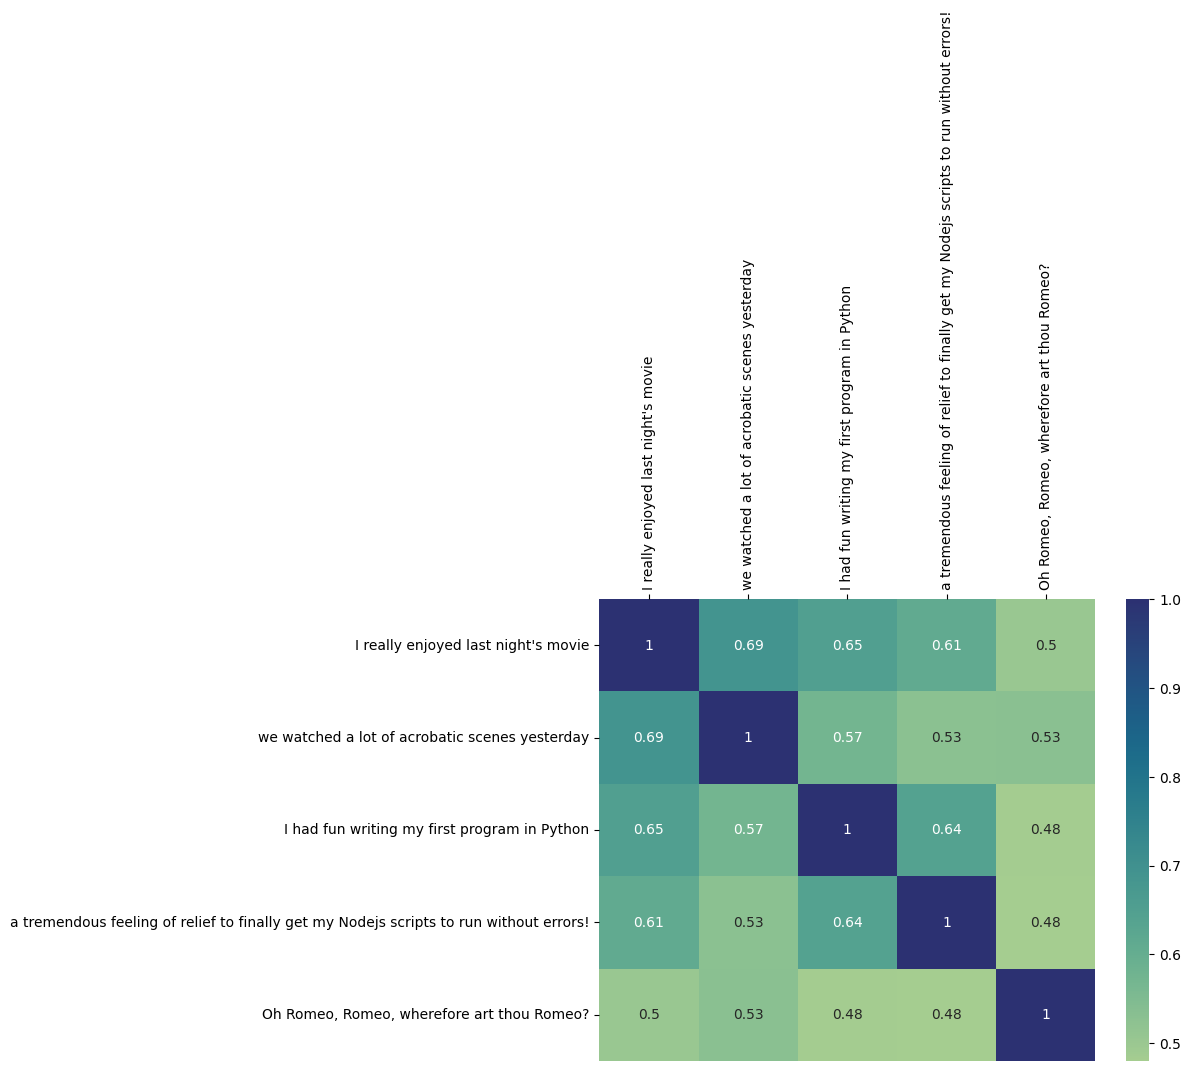

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.heatmap(similarities, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(text, rotation=90)
plt.show()

## Using `task_type` for different scenarios

When generating embeddings, especially for complex systems like Retrieval Augmented Generation (RAG), a one-size-fits-all approach can sometimes lead to lower-quality results. For instance, a question like "Why is the sky blue?" and its answer, "The scattering of sunlight causes the blue color," have distinct meanings as statements, and a general-purpose embedding model might not recognize their strong relationship. To solve this, you can specify a `task_type` when creating embeddings. This instructs the model to produce vectors that are specifically optimized for your intended use case, which can significantly improve performance while also saving time and cost.

The Gemini embedding model supports several task types, each tailored for a specific goal. Here’s a general overview of the available types and their applications:

*   **`SEMANTIC_SIMILARITY`**: Use this when your goal is to assess how semantically similar two pieces of text are.
*   **`RETRIEVAL_QUERY`** and **`RETRIEVAL_DOCUMENT`**: These are essential for information retrieval tasks. Use `RETRIEVAL_QUERY` for the user's search query and `RETRIEVAL_DOCUMENT` for the texts in your database that you want to search through. This is the foundation for building effective semantic search and RAG systems.
*   **`CLASSIFICATION`**: Choose this task type when you intend to use the embeddings to train a model that classifies text into a set of predefined categories.
*   **`CLUSTERING`**: If your goal is to group similar texts together to identify hidden trends or topics without pre-existing labels, this task type will generate embeddings optimized for that purpose.

This example is an intuition of how more complex RAG systems work - like when you are building one FAQ system. You will:

- define some information, representing data from documents
- use the embedding model to generate the embeddings for those information
- look for information similar to the question asked
- then use a Gemini generative model to customize one answer to the question.

First you will declare the information representing the documents, create one structure including document titles and contents and create a dataframe from it.

In [ ]:
contents01 = """
    Operating the Climate Control System Your Googlecar has a climate control system that allows you to adjust the temperature and airflow in the car.
    To operate the climate control system, use the buttons and knobs located on the center console.
    Temperature: The temperature knob controls the temperature inside the car.
    Turn the knob clockwise to increase the temperature or counterclockwise to decrease the temperature.
    Airflow: The airflow knob controls the amount of airflow inside the car.
    Turn the knob clockwise to increase the airflow or counterclockwise to decrease the airflow.
    Fan speed: The fan speed knob controls the speed of the fan.
    Turn the knob clockwise to increase the fan speed or counterclockwise to decrease the fan speed.
    Mode: The mode button allows you to select the desired mode.
    The available modes are: Auto: The car will automatically adjust the temperature and airflow to maintain a comfortable level.
    Cool: The car will blow cool air into the car.
    Heat: The car will blow warm air into the car.
    Defrost: The car will blow warm air onto the windshield to defrost it.
"""

contents02 = """
    Your Googlecar has a large touchscreen display that provides access to a variety of features, including navigation, entertainment, and climate control.
    To use the touchscreen display, simply touch the desired icon.
    For example, you can touch the "Navigation" icon to get directions to your destination or touch the "Music" icon to play your favorite songs.
"""

contents03 = """
    Shifting Gears Your Googlecar has an automatic transmission.
    To shift gears, simply move the shift lever to the desired position.
    Park: This position is used when you are parked. The wheels are locked and the car cannot move.
    Reverse: This position is used to back up.
    Neutral: This position is used when you are stopped at a light or in traffic.
    The car is not in gear and will not move unless you press the gas pedal.
    Drive: This position is used to drive forward.
    Low: This position is used for driving in snow or other slippery conditions.
"""

document01 = {
    "title": "Climate control system",
    "contents": " ".join(contents01.split())
}
document02 = {
    "title": "Touchscreen",
    "contents": " ".join(contents02.split())
}
document03 = {
    "title": "Shifting gears",
    "contents": " ".join(contents03.split())
}

documents = [document01, document02, document03]

docs_df = pd.DataFrame(documents)
docs_df.columns = ['title', 'contents']
docs_df

,title,contents
0,Climate control system,Operating the Climate Control System Your Goog...
1,Touchscreen,Your Googlecar has a large touchscreen display...
2,Shifting gears,Shifting Gears Your Googlecar has an automatic...


Now you will create the embeddings using the (`RETRIEVAL_DOCUMENT` task type) column into the dataframe:

In [ ]:
docs_df["embeddings"] = docs_df.apply(lambda x: client.models.embed_content(model=MODEL_ID, contents=(x['contents']), config=types.EmbedContentConfig(task_type="RETRIEVAL_DOCUMENT")).embeddings[0].values, axis=1)
docs_df

,title,contents,embeddings
0,Climate control system,Operating the Climate Control System Your Goog...,"[0.025201924, -0.003934131, 0.013785498, -0.04..."
1,Touchscreen,Your Googlecar has a large touchscreen display...,"[0.02184716, -0.004145778, 0.004038047, -0.059..."
2,Shifting gears,Shifting Gears Your Googlecar has an automatic...,"[0.012534659, 0.017149324, 0.0006287712, -0.04..."


Now you will create a function to do the interaction between questions and the search in the dataframe.

The `find_best_passage` function to, instead of searching for simple keywords, it searches for meaning.

Here’s a step-by-step breakdown of what it does when you ask a question:

- First, the function takes your query (e.g., "how do I change gears?") and uses the embedding model to convert it into an embedding using the `RETRIEVAL_QUERY` task type.
- Then the function compares the embeddings from your question to the numbers of every single document. It calculates a similarity score for each pair. A higher score means the meanings are more closely aligned.
- Finally, the function identifies the document with the single highest similarity score and returns its original text as the most relevant answer to your question

In [ ]:
import numpy as np

def find_best_passage(query: str, dataframe: pd.DataFrame, model: str) -> str:

  # 1. Create an embedding for the user's query.
  query_embedding = client.models.embed_content(
      model=model,
      contents=query,
      config=types.EmbedContentConfig(task_type="RETRIEVAL_QUERY")
  )

  # 2. Calculate the dot product to find the similarity between the query and all documents
  dot_products = np.dot(np.stack(dataframe.embeddings), query_embedding.embeddings[0].values)

  # 3. Find the index of the highest score and return the corresponding text.
  best_passage_index = np.argmax(dot_products)

  # 4. return the document contents more relevant to the question
  return dataframe.contents.iloc[best_passage_index]

Per example, for the question `"how to make the fan speed stronger on the car cooling system"` you have the following passage as the closest one:

In [ ]:
question = "how to make the fan speed stronger on the car cooling system"

best_passage = find_best_passage(question, docs_df, MODEL_ID)
best_passage

'Operating the Climate Control System Your Googlecar has a climate control system that allows you to adjust the temperature and airflow in the car. To operate the climate control system, use the buttons and knobs located on the center console. Temperature: The temperature knob controls the temperature inside the car. Turn the knob clockwise to increase the temperature or counterclockwise to decrease the temperature. Airflow: The airflow knob controls the amount of airflow inside the car. Turn the knob clockwise to increase the airflow or counterclockwise to decrease the airflow. Fan speed: The fan speed knob controls the speed of the fan. Turn the knob clockwise to increase the fan speed or counterclockwise to decrease the fan speed. Mode: The mode button allows you to select the desired mode. The available modes are: Auto: The car will automatically adjust the temperature and airflow to maintain a comfortable level. Cool: The car will blow cool air into the car. Heat: The car will blo

Now you can do one augmented generation (the last step of the RAG process) using the best passage found by the first step, but still having custom answers for users instead of simply pasting large documents chunks directly:

In [ ]:
from IPython.display import Markdown

final_answer_prompt = f"""
    Your Role: You are a friendly AI assistant. Your purpose is to explain information to users who are not experts.

    Your Task: Use the provided "Source Text" below to answer the user's question.

    Guidelines for your Response:

    Be Clear and Simple: Explain any complicated ideas in easy-to-understand terms. Avoid jargon.
    Be Friendly: Write in a warm, conversational, and approachable tone.
    Be Thorough: Construct a complete and detailed answer in full sentences, using all the relevant information from the source text.
    Stay on Topic: If the source text does not contain the answer, you must state that the information is not available in the provided material. Do not use outside knowledge.

    QUESTION: {question}
    PASSAGE: {best_passage}
"""

MODEL_ID = "gemini-3-flash-preview" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash", "gemini-2.5-pro", "gemini-2.5-flash-preview", "gemini-3-pro-preview"] {"allow-input":true, isTemplate: true}

final_answer = client.models.generate_content(
    model=MODEL_ID,
    contents=final_answer_prompt,
)

Markdown(final_answer.text)

Hello there! I can definitely help you understand how to make the fan speed stronger in your Googlecar.

Based on the information provided, to make the fan speed stronger, you'll want to:

1.  Look for the **fan speed knob** on the center console of your car.
2.  Once you find it, simply **turn this knob clockwise**. Turning it clockwise will increase how fast the fan blows air, making it stronger!

I hope this helps you get the airflow just right!

# Learning more

Check out these examples in the Cookbook to learn more about what you can do with embeddings:

- [Search Reranking](../examples/Search_reranking_using_embeddings.ipynb): Use embeddings from the Gemini API to rerank search results from Wikipedia.
- [Anomaly detection with embeddings](../examples/anomaly_detection.ipynb): Use embeddings from the Gemini API to detect potential outliers in your dataset.
- [Train a text classifier](../examples/Classify_text_with_embeddings.ipynb): Use embeddings from the Gemini API to train a model that can classify different types of newsgroup posts based on the topic.

Embeddings have many applications in Vector Databases, too. Check out these examples:
- With [Chroma DB](../examples/chromadb)
- With [LangChain](../examples/langchain)
- With [LlamaIndex](../examples/llamaindex)
- With [Qdrant](../examples/qdrant)
- With [Weaviate](../examples/weaviate)

You can learn more about embeddings in general on ai.google.dev in the embeddings guide
